**Table of Contents** <br>
* [1. Import libraries and datasets](#import)

* [2. Initial Exploration](#initialexploration)

* [3. Coherence Checking](#Coherence)

* [4. Split data](#Split)

* [5. Outliers Treatment](#outliers)
    * [5.1. Manual Limitation](#AutomaticLimitation)
    * [5.2. IQR](#IQR)
    * [5.3. 2-dimensional outliers](#2dim_outliers)

* [6. Missing values Treatment](#missings)

* [7. Scale the data](#scale)

* [8. Feature Engeneering](#FeatureEngeneering)

* [9. Feature Selection](#FeatureSelection)
    * [9.1. Univariate Analysis](#univariate)
    * [9.2. Filter Methods](#filter)
        * [9.2.1 Correlation Matrix](#correlation)
        * [9.2.2 Chi-Squared](#chi-squared)
        * [9.2.3 ANOVA](#ANOVA)
    * [9.3. Wrapper methods](#warpper)
        * [9.3.1 RFE](#RFE)
        * [9.3.2 Forward Sequential Feature Selection](#forward)
        * [9.3.3 Backward Sequential Feature Selection](#backward)
    * [9.4. Embedded methods](#embedded)
        * [9.4.1 Ridge Regression](#ridge)
        
* [10. Scale the data](#scale2)
* [11. Redo outliers check](#redo-outliers)

* [12. Check for an imbalanced dataset](#imbalanced)

* [13.  Adaptive Syntetic Oversampling](#Adaptive)

<hr>
<a class="anchor" id="import">
    
# 1. Import libraries and datasets
    
</a>

In [41]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import scipy.stats as stats
import datetime as dt

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

<hr>
<a class="anchor" id="initialexploration">
    
# 2. Initial Exploration
    
</a>

In [44]:
df.head()

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
0,102863333,21-Mar-20,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,MacOSX,2,Portugal,1,Returner,0
1,103117814,20-May-20,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,Windows,2,France,6,Returner,0
2,103201891,4-Dec-20,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,Windows,4,Italy,1,Returner,0
3,103226087,22-Dec-20,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,Windows,2,United Kingdom,2,Returner,1
4,103234445,24-Nov-20,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,Windows,2,Spain,3,Returner,1


In [45]:
df.describe()

,Access_ID,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Browser,Type_of_Traffic,Buy
count,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,4.519728e+08,2.324232,81.205854,0.508051,34.559101,31.685869,1199.769430,0.022305,0.043181,5.963120,2.352535,3.957496,0.155216
std,2.024990e+08,3.340676,179.715545,1.279390,139.796989,44.550277,1958.276304,0.048776,0.048845,18.753626,1.715698,3.675159,0.362128
min,1.028633e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.731950e+08,0.000000,0.000000,0.000000,0.000000,7.000000,183.562500,0.000000,0.014300,0.000000,2.000000,2.000000,0.000000
50%,4.536169e+08,1.000000,7.500000,0.000000,0.000000,18.000000,599.000000,0.003200,0.025100,0.000000,2.000000,2.000000,0.000000
75%,6.259756e+08,4.000000,92.208350,0.000000,0.000000,38.000000,1470.270800,0.016800,0.050000,0.000000,2.000000,4.000000,0.000000
max,7.984440e+08,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522200,0.200000,0.200000,361.763700,13.000000,15.000000,1.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Access_ID                   9999 non-null   int64  
 1   Date                        9999 non-null   object 
 2   AccountMng_Pages            9999 non-null   int64  
 3   AccountMng_Duration         9999 non-null   float64
 4   FAQ_Pages                   9999 non-null   int64  
 5   FAQ_Duration                9999 non-null   float64
 6   Product_Pages               9999 non-null   int64  
 7   Product_Duration            9999 non-null   float64
 8   GoogleAnalytics_BounceRate  9999 non-null   float64
 9   GoogleAnalytics_ExitRate    9999 non-null   float64
 10  GoogleAnalytics_PageValue   9999 non-null   float64
 11  OS                          9999 non-null   object 
 12  Browser                     9999 non-null   int64  
 13  Country                     9999 

In [47]:
df.isna().sum()

Access_ID                     0
Date                          0
AccountMng_Pages              0
AccountMng_Duration           0
FAQ_Pages                     0
FAQ_Duration                  0
Product_Pages                 0
Product_Duration              0
GoogleAnalytics_BounceRate    0
GoogleAnalytics_ExitRate      0
GoogleAnalytics_PageValue     0
OS                            0
Browser                       0
Country                       0
Type_of_Traffic               0
Type_of_Visitor               0
Buy                           0
dtype: int64

In [48]:
techScapeReport = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
#techScapeReport.to_notebook_iframe()

## Data Preparation

### Access_ID

<b>Unique identification of the user access to the website
* The Access_ID variable is 100% distinct across all records, hence we can use it as an index.

In [49]:
df = df.set_index(["Access_ID"])
test = test.set_index(["Access_ID"])

### Date

<b>Website visit date

* For practicality it was decided to convert the date variable to a datetime object

In [50]:
df["Date"] = pd.to_datetime(df["Date"], format = "%d-%b-%y")
test["Date"] = pd.to_datetime(test["Date"], format = "%d-%b-%y")

In [51]:
# Checking datatypes
df.dtypes

Date                          datetime64[ns]
AccountMng_Pages                       int64
AccountMng_Duration                  float64
FAQ_Pages                              int64
FAQ_Duration                         float64
Product_Pages                          int64
Product_Duration                     float64
GoogleAnalytics_BounceRate           float64
GoogleAnalytics_ExitRate             float64
GoogleAnalytics_PageValue            float64
OS                                    object
Browser                                int64
Country                               object
Type_of_Traffic                        int64
Type_of_Visitor                       object
Buy                                    int64
dtype: object

In [52]:
def conversion_type(df):

    df['AccountMng_Pages']=df['AccountMng_Pages'].astype(pd.Int32Dtype())
    df['AccountMng_Duration']=df['AccountMng_Duration'].astype(pd.Float32Dtype())
    df['FAQ_Pages']=df['FAQ_Pages'].astype(pd.Int32Dtype())
    df['FAQ_Duration']=df['FAQ_Duration'].astype(pd.Float32Dtype())
    df['Product_Pages']=df['Product_Pages'].astype(pd.Int32Dtype())
    df['Product_Duration']=df['Product_Duration'].astype(pd.Float32Dtype())
    df['GoogleAnalytics_BounceRate']=df['GoogleAnalytics_BounceRate'].astype(pd.Float32Dtype())
    df['GoogleAnalytics_ExitRate']=df['GoogleAnalytics_ExitRate'].astype(pd.Float32Dtype())
    df['GoogleAnalytics_PageValue']=df['GoogleAnalytics_PageValue'].astype(pd.Float32Dtype())
    df['OS']=df['OS'].astype(pd.StringDtype())
    df['Browser']=df['Browser'].astype(pd.Int32Dtype())
    df['Country']=df['Country'].astype(pd.StringDtype())
    df['Type_of_Traffic']=df['Type_of_Traffic'].astype(pd.Int32Dtype())
    df['Type_of_Visitor']=df['Type_of_Visitor'].astype(pd.StringDtype())
    


In [53]:
conversion_type(df)
conversion_type(test)
df['Buy']=df['Buy'].astype(pd.Int32Dtype())

In [54]:
df.dtypes

Date                          datetime64[ns]
AccountMng_Pages                       Int32
AccountMng_Duration                  Float32
FAQ_Pages                              Int32
FAQ_Duration                         Float32
Product_Pages                          Int32
Product_Duration                     Float32
GoogleAnalytics_BounceRate           Float32
GoogleAnalytics_ExitRate             Float32
GoogleAnalytics_PageValue            Float32
OS                                    string
Browser                                Int32
Country                               string
Type_of_Traffic                        Int32
Type_of_Visitor                       string
Buy                                    Int32
dtype: object

<hr>
<a class="anchor" id="Coherence">
    
# 3. Coherence Checking
    
</a>

In [55]:
# confirming that the first and last day of every month is correct
df['day']=df['Date'].dt.day
df.groupby(df['Date'].dt.month).agg(['min', 'max'])['day']

,min,max
Date,,
2,1,29
3,1,31
5,1,31
6,1,30
7,1,31
8,1,31
9,1,30
10,1,31
11,1,30


In [56]:
df[(df['AccountMng_Duration']>0) & (df['AccountMng_Pages']==0)]
df[(df['AccountMng_Duration']==0) & (df['AccountMng_Pages']>0)] 
#df[(df['FAQ_Pages']>0) & (df['FAQ_Duration']==0)]#176
#df[(df['FAQ_Pages']==0) & (df['FAQ_Duration']>0)]
#df[(df['Product_Pages']==0) & (df['Product_Pages']>0)]
#df[(df['Product_Pages']>0) & (df['Product_Pages']==0)]

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,day
Access_ID,,,,,,,,,,,,,,,,,
104650368,2020-11-05,1,0.0,0,0.0,14,1125.875,0.0,0.0429,0.0,Windows,2,Portugal,2,Returner,0,5
107375098,2020-08-07,1,0.0,3,69.0,15,352.875,0.0,0.0556,0.0,Windows,2,Spain,2,Returner,0,7
113677580,2020-11-28,1,0.0,0,0.0,39,1159.541748,0.0013,0.0313,0.0,Windows,2,Other,2,Returner,1,28
115628954,2020-05-23,2,0.0,0,0.0,0,0.0,0.2,0.2,0.0,Android,2,Portugal,6,Returner,0,23
116343256,2020-10-11,1,0.0,1,66.400002,14,668.316711,0.0143,0.0286,44.893501,iOS,2,Portugal,15,Returner,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776479996,2020-06-26,1,0.0,0,0.0,12,277.450012,0.06,0.09,0.0,MacOSX,2,Spain,13,Returner,0,26
776570163,2020-05-25,1,0.0,0,0.0,27,889.0,0.0214,0.0679,0.0,iOS,1,Spain,3,Returner,0,25
778884123,2020-05-26,1,0.0,0,0.0,90,5621.599121,0.0,0.0131,2.099,Windows,2,Italy,2,Returner,0,26


In [57]:
df=df[~(
    
        ((df['AccountMng_Duration']>0) & (df['AccountMng_Pages']==0))|
        ((df['AccountMng_Duration']==0) & (df['AccountMng_Pages']>0))|
        ((df['FAQ_Pages']>0) & (df['FAQ_Duration']==0))|
        ((df['FAQ_Pages']==0) & (df['FAQ_Duration']>0))|
        ((df['Product_Pages']==0) & (df['Product_Pages']>0))|
        ((df['Product_Pages']>0) & (df['Product_Pages']==0))|
        (df['GoogleAnalytics_BounceRate']>1)|
        (df['GoogleAnalytics_BounceRate']<0)|

        (df['GoogleAnalytics_ExitRate']>1)|
        (df['GoogleAnalytics_ExitRate']<0)|
        (df['GoogleAnalytics_BounceRate']>1)|
        (df['GoogleAnalytics_BounceRate']<0)|
        (df['Date']>dt.datetime(2020,12,31))|
        (df['Date']<dt.datetime(2020,1,31))
    
        )]

In [58]:
df[df['Date']>dt.datetime(2020,1,31)]

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,day
Access_ID,,,,,,,,,,,,,,,,,
102863333,2020-03-21,0,0.0,0,0.0,3,64.0,0.0,0.0667,0.0,MacOSX,2,Portugal,1,Returner,0,21
103117814,2020-05-20,0,0.0,0,0.0,23,684.5,0.0217,0.0449,0.0,Windows,2,France,6,Returner,0,20
103201891,2020-12-04,0,0.0,0,0.0,8,95.0,0.025,0.0583,0.0,Windows,4,Italy,1,Returner,0,4
103226087,2020-12-22,0,0.0,0,0.0,9,608.75,0.0,0.025,42.422501,Windows,2,United Kingdom,2,Returner,1,22
103234445,2020-11-24,0,0.0,2,386.0,36,1609.939697,0.0,0.0093,12.5033,Windows,2,Spain,3,Returner,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798279589,2020-05-08,3,159.0,2,55.5,23,1100.125,0.0,0.0111,0.0,MacOSX,2,Brazil,14,Returner,0,8
798314158,2020-07-17,6,175.100006,0,0.0,3,27.6,0.0,0.0111,0.0,Windows,10,Spain,5,New_Access,0,17
798339820,2020-03-23,0,0.0,0,0.0,27,644.0,0.0077,0.0519,0.0,MacOSX,2,France,3,Returner,0,23


In [59]:
# percentage of records removed due to inconsistency
289/9999

0.028902890289028902

<hr>
<a class="anchor" id="Split">
    
# 2. Split the data
    
</a>

In [60]:
X = df.drop("Buy", axis = 1)
y = df["Buy"]

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_val,y_train,y_val = train_test_split(X,y, stratify = y, train_size = 0.70,random_state = 0, shuffle = True)

### Separate Numerical from Categorical 

In [63]:
# X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
# X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)
# #For validation
# X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
# X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

In [64]:
non_num_feat=['Date', 'OS', 'Country', 'Type_of_Traffic', 'Type_of_Visitor', 'day','Browser']
X_train_num = X_train.drop(columns=non_num_feat)
X_train_cat=X_train[non_num_feat]

X_val_num = X_val.drop(columns=non_num_feat)
X_val_cat=X_val[non_num_feat]

<hr>
<a class="anchor" id="outliers">
    
# 2. Outliers Treatment
    
</a>

<b>Using drop_outliers to drop unwanted outliers from df </b>
* Having analysed the distrbution of this variable, it became apparent that there may be outliers.
* It was decided to drop the outliers and then later on reintroduce them if, as a result, the accuracy of the model suffered. Dropped ___ records (7.7%).

<hr>
<a class="anchor" id="AutomaticLimitation">
    
## Manual Limitation
    
</a>

Text(0.5, 0.98, "Numeric Variables' Histograms")

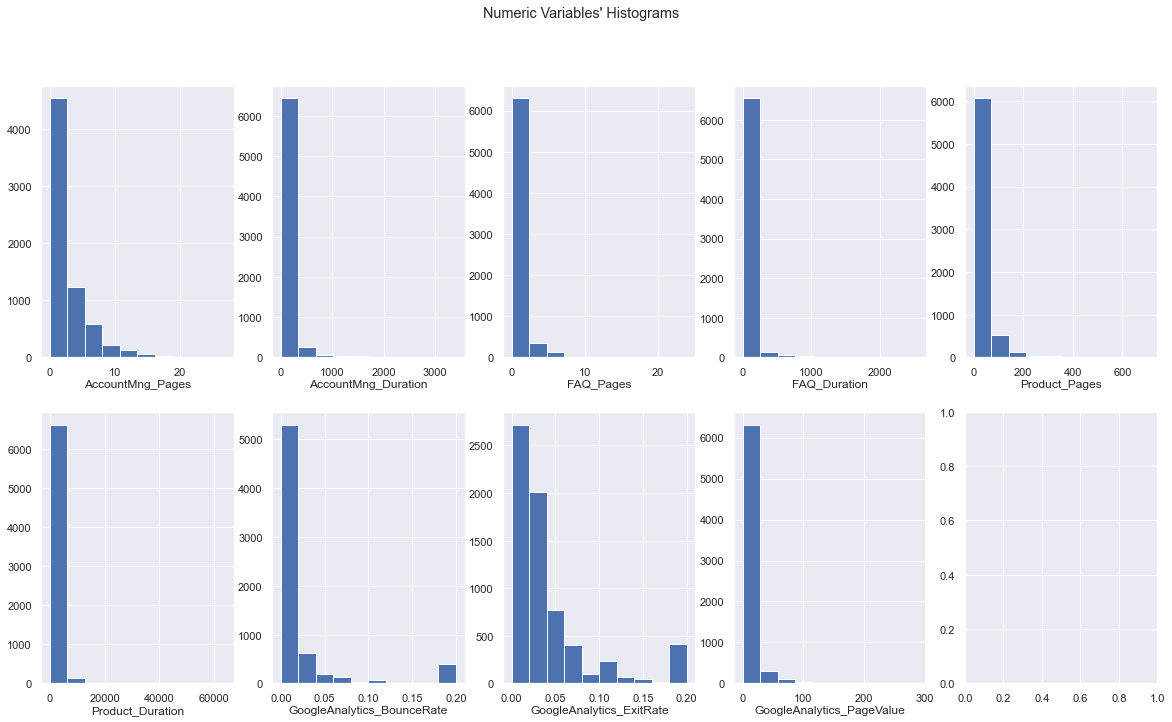

In [65]:
# All Numeric Variables' Histograms in one figure
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
%matplotlib inline


sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(X_train_num.columns.tolist()) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), (X_train_num.columns.tolist())): # Notice the zip() function and flatten() method
    ax.hist(X_train_num[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

#plt.savefig("teste.png")

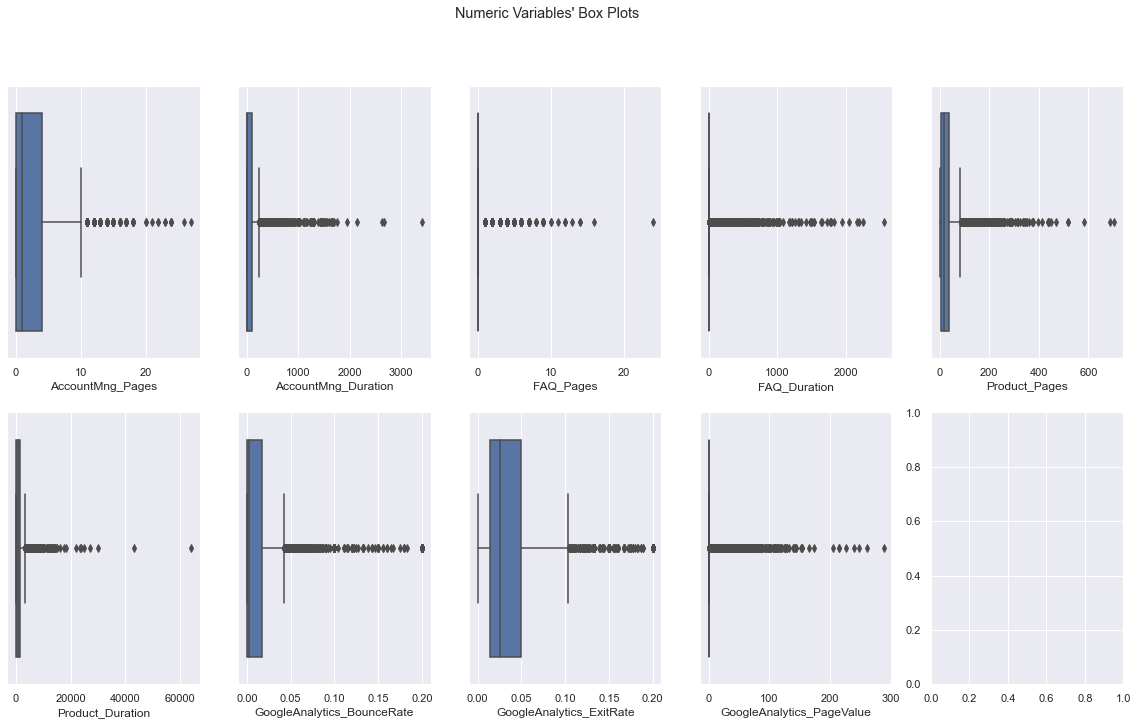

In [66]:
# All Numeric Variables' Box Plots in one figure
%matplotlib inline
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(X_train_num.columns.tolist()) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), X_train_num.columns.tolist()): # Notice the zip() function and flatten() method
    sns.boxplot(x=X_train[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [68]:
(len(X_train)-6270 )/len(X_train)

0.07753420626747094

In [69]:
(6797-6271 )/6797 

0.07738708253641312

In [70]:
len(X_train)

6797

In [71]:
filters1 = (
         (X_train['AccountMng_Pages']<=28)
         &
         (X_train['AccountMng_Duration']<=3000)
         &
         (X_train['FAQ_Pages']<=20)
         &
         (X_train['FAQ_Duration']<=2500)
         &
         (X_train['Product_Pages']<=600)
         &
         (X_train['Product_Duration']<=60000)
         &
         (X_train['GoogleAnalytics_BounceRate']<=0.19)
         &
         (X_train['GoogleAnalytics_ExitRate']<=0.19)
         &
         (X_train['GoogleAnalytics_PageValue']<=300)
         )

teste=X_train[filters1]
teste

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,day
Access_ID,,,,,,,,,,,,,,,,
746917175,2020-09-19,4,77.099998,0,0.0,4,41.700001,0.0,0.0286,0.0,Windows,2,Brazil,6,Returner,19
565616559,2020-12-16,0,0.0,4,8.0,66,1514.836304,0.0229,0.0449,0.0,Windows,2,Other,2,Returner,16
276412217,2020-12-30,7,131.833298,0,0.0,63,2074.611084,0.0108,0.02,0.0,MacOSX,2,Spain,10,Returner,30
361837847,2020-05-20,0,0.0,0,0.0,2,121.0,0.0,0.05,0.0,MacOSX,2,Portugal,3,Returner,20
568629484,2020-03-20,0,0.0,0,0.0,21,1003.0,0.0,0.0083,0.0,Windows,4,Portugal,1,Returner,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789752052,2020-07-02,5,109.599998,1,3.0,29,1980.266724,0.0061,0.0263,0.0,Windows,2,Portugal,4,Returner,2
581081929,2020-03-22,0,0.0,0,0.0,12,169.300003,0.0,0.0167,0.0,Windows,2,Spain,2,Returner,22
283517225,2020-12-25,5,97.0,0,0.0,53,3372.748291,0.0038,0.0025,0.0,Windows,2,Italy,2,Returner,25


In [79]:
X_train[(X_train['AccountMng_Pages']<=28)
          &
          (X_train['AccountMng_Duration']<=3000)
          &
          (X_train['FAQ_Pages']<=20)
          &
          (X_train['FAQ_Duration']<=2500)
          &
          (X_train['Product_Pages']<=600)
          &
          (X_train['Product_Duration']<=60000)
          &
          (X_train['GoogleAnalytics_BounceRate']<=0.19)
#          &
#          (X_train['GoogleAnalytics_ExitRate']<=0.19)
#          &
#          (X_train['GoogleAnalytics_PageValue']<=300)
       ]

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,day
Access_ID,,,,,,,,,,,,,,,,
746917175,2020-09-19,4,77.099998,0,0.0,4,41.700001,0.0,0.0286,0.0,Windows,2,Brazil,6,Returner,19
565616559,2020-12-16,0,0.0,4,8.0,66,1514.836304,0.0229,0.0449,0.0,Windows,2,Other,2,Returner,16
276412217,2020-12-30,7,131.833298,0,0.0,63,2074.611084,0.0108,0.02,0.0,MacOSX,2,Spain,10,Returner,30
361837847,2020-05-20,0,0.0,0,0.0,2,121.0,0.0,0.05,0.0,MacOSX,2,Portugal,3,Returner,20
568629484,2020-03-20,0,0.0,0,0.0,21,1003.0,0.0,0.0083,0.0,Windows,4,Portugal,1,Returner,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789752052,2020-07-02,5,109.599998,1,3.0,29,1980.266724,0.0061,0.0263,0.0,Windows,2,Portugal,4,Returner,2
581081929,2020-03-22,0,0.0,0,0.0,12,169.300003,0.0,0.0167,0.0,Windows,2,Spain,2,Returner,22
283517225,2020-12-25,5,97.0,0,0.0,53,3372.748291,0.0038,0.0025,0.0,Windows,2,Italy,2,Returner,25


In [30]:
#def manual_filter(df):
def filter_outlier(df):
    filters1 = (
             (df['AccountMng_Pages']<=28)
             &
             (df['AccountMng_Duration']<=3000)
             &
             (df['FAQ_Pages']<=20)
             &
             (df['FAQ_Duration']<=2500)
             &
             (df['Product_Pages']<=600)
             &
             (df['Product_Duration']<=60000)
             &
             (df['GoogleAnalytics_BounceRate']<=0.19)
             &
             (df['GoogleAnalytics_ExitRate']<=0.19)
             &
             (df['GoogleAnalytics_PageValue']<=300)
             &
             (df['Browser']<=9)
             )
    return df[filters1],df[~filters1].index

In [31]:
index_out_train=filter_outlier(X_train)[1].tolist()

In [32]:
index_out_val=filter_outlier(X_val)[1].tolist()

In [33]:
X_val_no_out=filter_outlier(X_val)[0]

In [34]:
X_train_no_out=filter_outlier(X_train)[0]

In [35]:
X_train_no_out

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,day
Access_ID,,,,,,,,,,,,,,,,
746917175,2020-09-19,4,77.099998,0,0.0,4,41.700001,0.0,0.0286,0.0,Windows,2,Brazil,6,Returner,19
565616559,2020-12-16,0,0.0,4,8.0,66,1514.836304,0.0229,0.0449,0.0,Windows,2,Other,2,Returner,16
276412217,2020-12-30,7,131.833298,0,0.0,63,2074.611084,0.0108,0.02,0.0,MacOSX,2,Spain,10,Returner,30
361837847,2020-05-20,0,0.0,0,0.0,2,121.0,0.0,0.05,0.0,MacOSX,2,Portugal,3,Returner,20
568629484,2020-03-20,0,0.0,0,0.0,21,1003.0,0.0,0.0083,0.0,Windows,4,Portugal,1,Returner,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789752052,2020-07-02,5,109.599998,1,3.0,29,1980.266724,0.0061,0.0263,0.0,Windows,2,Portugal,4,Returner,2
581081929,2020-03-22,0,0.0,0,0.0,12,169.300003,0.0,0.0167,0.0,Windows,2,Spain,2,Returner,22
283517225,2020-12-25,5,97.0,0,0.0,53,3372.748291,0.0038,0.0025,0.0,Windows,2,Italy,2,Returner,25


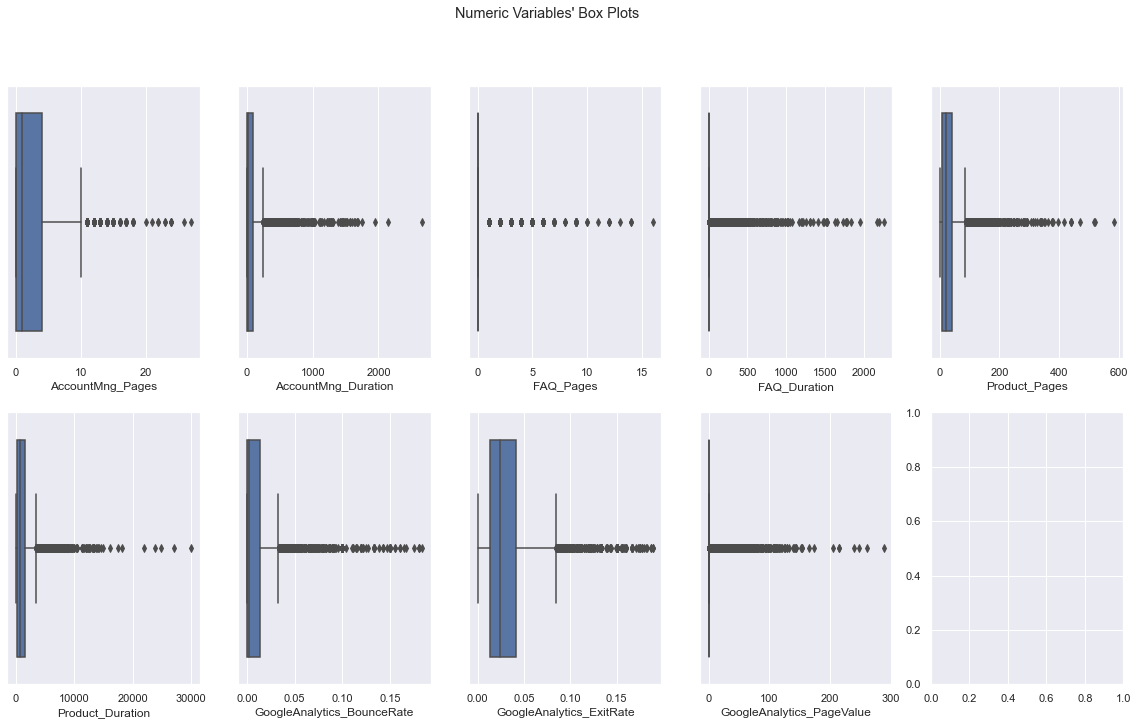

In [36]:
# All Numeric Variables' Box Plots in one figure
%matplotlib inline
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(X_train_no_out.drop(columns=non_num_feat, axis=1).columns.tolist()) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), X_train_no_out.drop(columns=non_num_feat, axis=1).columns.tolist()): # Notice the zip() function and flatten() method
    sns.boxplot(x=(X_train_no_out[feat]), ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [37]:
# remove outliers records from y_train
y_train_df=pd.DataFrame(y_train)
y_train_df=y_train_df[~y_train_df.index.isin(index_out_train)]

In [38]:
# remove outliers records from y_val
y_val_df=pd.DataFrame(y_val)
y_val_df[~y_val_df.index.isin(index_out_val)]

,Buy
Access_ID,
609666640,1
598178285,0
535781019,1
436628688,0
707978633,1
...,...
294996079,0
442079450,0
369120236,0


In [39]:
X_train_no_out_num = X_train_no_out.drop(columns=non_num_feat)
X_train_no_out_cat=X_train_no_out[non_num_feat]

# X_val_no_out_num = X_val_no_out.drop(columns=non_num_feat)
# X_val_no_out_cat=X_val_no_out[non_num_feat]

<hr>
<a class="anchor" id="2dim_outliers">
    
## Multi-dimentional outliers
    
</a>

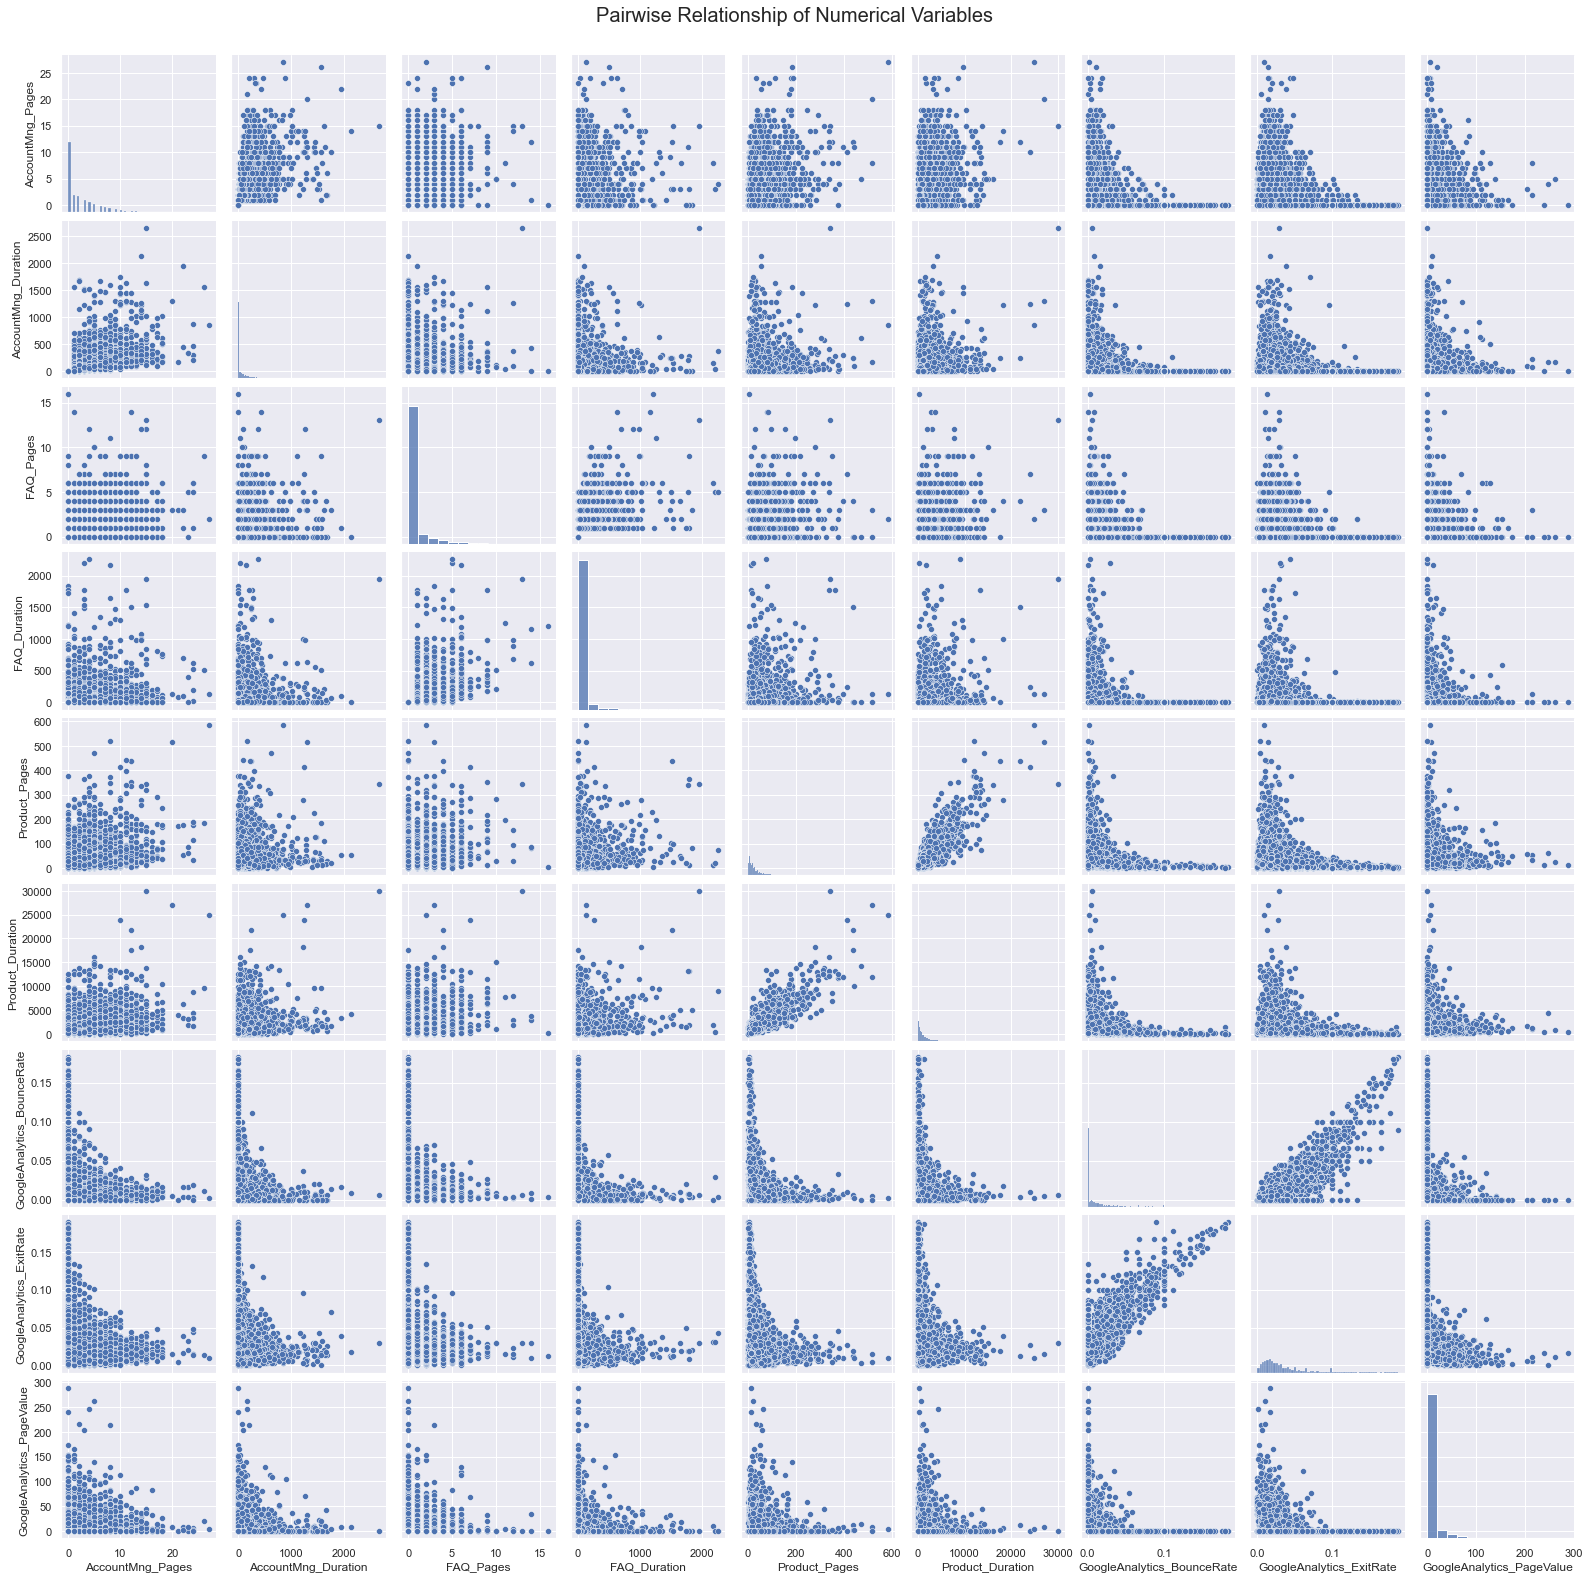

In [62]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(X_train_no_out_num, diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

#plt.savefig(os.path.join('..', 'figures', 'pairwise_relationship_of_numerical_variables.png'), dpi=200)
plt.show()

In [151]:
q25 = df.quantile(.25)
print(q25)
q75 = df.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters2 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(df[metric].between(llim, ulim, inclusive=True))
print(filters2)
filters2 = pd.Series(np.all(filters2, 0))
df_2 = df[filters2]
print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0] / df_original.shape[0], 4))

AccountMng_Pages                     0.0
AccountMng_Duration                  0.0
FAQ_Pages                            0.0
FAQ_Duration                         0.0
Product_Pages                        7.0
Product_Duration              181.016678
GoogleAnalytics_BounceRate           0.0
GoogleAnalytics_ExitRate          0.0141
GoogleAnalytics_PageValue            0.0
Browser                              2.0
Type_of_Traffic                      2.0
Buy                                  0.0
day                                  8.0
Name: 0.25, dtype: Float64
[Access_ID
102863333    True
103117814    True
103201891    True
103226087    True
103234445    True
             ... 
798279589    True
798314158    True
798339820    True
798371242    True
798444008    True
Name: AccountMng_Pages, Length: 9710, dtype: boolean, Access_ID
102863333    True
103117814    True
103201891    True
103226087    True
103234445    True
             ... 
798279589    True
798314158    True
798339820    True
79837

C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_13972/4171543322.py:13: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  filters2.append(df[metric].between(llim, ulim, inclusive=True))
C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_13972/4171543322.py:13: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  filters2.append(df[metric].between(llim, ulim, inclusive=True))
C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_13972/4171543322.py:13: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  filters2.append(df[metric].between(llim, ulim, inclusive=True))
C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_13972/4171543322.py:13: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  filters2.append(df[metric].between(llim, ulim, inclusive=True))
C:\Users\UTILIZ~1\AppData\Lo

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [75]:
df_no_out = df[(filters1 | filters2)]
print('Percentage of data kept after removing outliers:', np.round(df_no_out.shape[0] / df.shape[0], 4))

Percentage of data kept after removing outliers: 0.9693


C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_14792/2221622883.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_out = df[(filters1 | filters2)]


In [193]:
def drop_outliers_IQR(data, iqr_mult,  metric_features):

    filters2 = []
    for metric in metric_features:
    
        q25 = data[metric].quantile(.25)
        q75 = data[metric].quantile(.75)
        iqr = (q75 - q25)
        upper_lim = q75 + iqr_mult * iqr
        lower_lim = q25 - iqr_mult * iqr
        print(upper_lim)
        print(lower_lim)
        filters2.append(data[metric].between(lower_lim, upper_lim, inclusive=True))
        
        print(filters2[filters2==False])
    
       
    
    df_2 = data[filters2]

   
    return df_2

In [194]:
drop_outliers_IQR(df,1,metric_features=['Product_Duration'])

2735.9442138671875
-1096.4470672607422
Access_ID
102863333    True
103117814    True
103201891    True
103226087    True
103234445    True
             ... 
798279589    True
798314158    True
798339820    True
798371242    True
798444008    True
Name: Product_Duration, Length: 9710, dtype: boolean


C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_14792/2098000812.py:13: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  filters2.append(data[metric].between(lower_lim, upper_lim, inclusive=True))


KeyError: "None of [Index([(True, True, True, True, True, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, False, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, True, True, True, False, True, False, True, True, True, True, True, True, False, True, True, False, True, True, True, True, ...)], dtype='object')] are in the [columns]"

In [49]:
def drop_outliers(df, z_score, *args):
    """Drop statistical outliers from selected columns in selected dataframes with selected z-score as threshold. 

    Args:
        df (DataFrame): DataFrame to apply function to.
        z_score (int): Number of standard deviations away from the mean set as a threshold to drop outliers from.
        drop (bool): True allows for *columns to be columns to drop, whilst False allows *columns to be the only selected columns to use.
        *columns (str): Columns which need to be selected or dropped based on drop argument.

    Returns:
        [DataFrame: [description]
    """

    initial_length = len(df)

    for col in df.columns:
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')) & (col in args):
            inital_length_col = len(df)
            df = df[~(np.abs(stats.zscore(df["FAQ_Pages"])) > z_score)]
            final_length_col = len(df)
            print("-------------------------------")
            print(f"Flitering: {col}\nDropped {inital_length_col-final_length_col} ({round(((inital_length_col-final_length_col)/inital_length_col)*100,2)}%) records")
        else:
            df[col]=df[col]

    final_length = len(df)
    print("-------------------------------")
    print("-------------------------------")
    print(f"Removed: {initial_length - final_length} ({round(((initial_length - final_length)/initial_length)*100,2)}%) records.\n ")

    return df

In [50]:
train_no_outliers = drop_outliers(df,3, "FAQ_Pages")

-------------------------------
-------------------------------
Removed: 0 (0.0%) records.
 


In [51]:
train_no_outliers[~(np.abs(stats.zscore(train_no_outliers["FAQ_Pages"])) > 5)]

TypeError: loop of ufunc does not support argument 0 of type float which has no callable sqrt method

<hr>
<a class="anchor" id="FeatureEngeneering">
    
# Feature Engineering
    
</a>

In [40]:
def feat_eng(df):

    df['month']=df['Date'].dt.month
    df['avg_duration_account'] = np.where(
        df['AccountMng_Pages']==0, 0,np.divide(df['AccountMng_Duration'],df['AccountMng_Pages'])) 

    df['avg_duration_FAQ'] = np.where(
        df['FAQ_Pages']==0, 0,np.divide(df['FAQ_Duration'],df['FAQ_Pages'])) 

    df['avg_duration_product'] = np.where(
        df['Product_Pages']==0, 0,np.divide(df['Product_Duration'],df['Product_Pages'])) 

    df['bounce_exit'] = np.where(
        df['GoogleAnalytics_ExitRate']==0, 0,np.divide(df['GoogleAnalytics_BounceRate'],df['GoogleAnalytics_ExitRate'])) 

    df['log_AccountMng_Duration']=np.log10(df['AccountMng_Duration']+1)
    df['log_AccountMng_Pages']=np.log10(df['AccountMng_Pages']+1)
    df['log_FAQ_Duration']=np.log10(df['FAQ_Duration']+1)
    df['log_FAQ_Pages']=np.log10(df['FAQ_Pages']+1)
    df['log_Product_Duration']=np.log10(df['Product_Duration']+1)
    df['log_Product_Pages']=np.log10(df['Product_Pages']+1)
    df['log_BounceRate']=np.log10(df['GoogleAnalytics_BounceRate']+1)
    df['log_ExitRate']=np.log10(df['GoogleAnalytics_ExitRate']+1)
    df['log_PageValue']=np.log10(df['GoogleAnalytics_PageValue']+1)

In [41]:
feat_eng(X_train_no_out)
feat_eng(X_val_no_out)
#  DO FOR TEST
feat_eng(test)

## One Hot_encoding

In [65]:
ohc_feat=['Browser','Country','OS','Type_of_Visitor','Type_of_Traffic']

In [66]:
from sklearn.preprocessing import OneHotEncoder
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features (pass feature names)
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(X_train_no_out[ohc_feat])
ohc_feat_names = ohc.get_feature_names()
ohc_X_train = pd.DataFrame(ohc_feat, index=X_train_no_out.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
ohc_X_train.columns

Index(['x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'x0_7', 'x0_8', 'x1_France',
       'x1_Germany', 'x1_Italy', 'x1_Other', 'x1_Portugal', 'x1_Spain',
       'x1_Switzerland', 'x1_United Kingdom', 'x2_Chrome OS', 'x2_MacOSX',
       'x2_Other', 'x2_Ubuntu', 'x2_Windows', 'x2_iOS', 'x3_Other',
       'x3_Returner', 'x4_2', 'x4_3', 'x4_4', 'x4_5', 'x4_6', 'x4_7', 'x4_8',
       'x4_9', 'x4_10', 'x4_11', 'x4_12', 'x4_13', 'x4_14', 'x4_15'],
      dtype='object')

In [67]:
ohc_X_train.rename(columns={'x0_2':'browser2','x0_3':'browser3','x0_4':'browser4','x0_5':'browser5','x0_6':'browser6','x0_7':'browser7','x0_8':'browser8','x4_2':'traffic2', 'x4_3':'traffic3', 'x4_4':'traffic4', 'x4_5':'traffic5', 'x4_6':'traffic6', 'x4_7':'traffic7', 'x4_8':'traffic8',
       'x4_9':'traffic9', 'x4_10':'traffic10', 'x4_11':'traffic11', 'x4_12':'traffic12', 'x4_13':'traffic13', 'x4_14':'traffic14', 'x4_15':'traffic15'},inplace=True)

In [68]:
X_train_eng=X_train_no_out.join(ohc_X_train)

In [69]:
X_train_eng

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,...,traffic6,traffic7,traffic8,traffic9,traffic10,traffic11,traffic12,traffic13,traffic14,traffic15
Access_ID,,,,,,,,,,,,,,,,,,,,,
746917175,2020-09-19,4,77.099998,0,0.0,4,41.700001,0.0,0.0286,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
565616559,2020-12-16,0,0.0,4,8.0,66,1514.836304,0.0229,0.0449,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276412217,2020-12-30,7,131.833298,0,0.0,63,2074.611084,0.0108,0.02,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
361837847,2020-05-20,0,0.0,0,0.0,2,121.0,0.0,0.05,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
568629484,2020-03-20,0,0.0,0,0.0,21,1003.0,0.0,0.0083,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789752052,2020-07-02,5,109.599998,1,3.0,29,1980.266724,0.0061,0.0263,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581081929,2020-03-22,0,0.0,0,0.0,12,169.300003,0.0,0.0167,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
283517225,2020-12-25,5,97.0,0,0.0,53,3372.748291,0.0038,0.0025,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
X_val_eng=X_val_no_out.join(ohc_X_val)

NameError: name 'ohc_X_val' is not defined

# do the same for test and validation-- one hot encoding

In [123]:
binary_list=ohc_X_train.columns.to_list()

In [124]:
non_num_feat1=non_num_feat+binary_list

In [125]:
non_num_feat1

['Date',
 'OS',
 'Country',
 'Type_of_Traffic',
 'Type_of_Visitor',
 'day',
 'Browser',
 'browser2',
 'browser3',
 'browser4',
 'browser5',
 'browser6',
 'browser7',
 'browser8',
 'x1_France',
 'x1_Germany',
 'x1_Italy',
 'x1_Other',
 'x1_Portugal',
 'x1_Spain',
 'x1_Switzerland',
 'x1_United Kingdom',
 'x2_Chrome OS',
 'x2_MacOSX',
 'x2_Other',
 'x2_Ubuntu',
 'x2_Windows',
 'x2_iOS',
 'x3_Other',
 'x3_Returner',
 'traffic2',
 'traffic3',
 'traffic4',
 'traffic5',
 'traffic6',
 'traffic7',
 'traffic8',
 'traffic9',
 'traffic10',
 'traffic11',
 'traffic12',
 'traffic13',
 'traffic14',
 'traffic15']

In [126]:
X_train_eng_num = X_train_eng.drop(columns=non_num_feat1)

In [127]:
X_val_eng_num = X_val_eng.drop(columns=non_num_feat1)

NameError: name 'X_val_eng' is not defined

<hr>
<a class="anchor" id="scale">
    
# Scaling Data
    
</a>

In [128]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler().fit(X_train_eng_num)
X_train_eng_num_scaled_min = scaler.transform(X_train_eng_num) 

# Convert the array to a pandas dataframe
X_train_num_min = pd.DataFrame(X_train_eng_num_scaled_min, columns = X_train_eng_num.columns).set_index(X_train_eng_num.index)
X_train_num_min.head(3)
X_train_num_min.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,6271.0,0.091408,0.125411,0.0,0.000000,0.037037,0.148148,1.0
AccountMng_Duration,6271.0,0.032560,0.067319,0.0,0.000000,0.006586,0.037632,1.0
FAQ_Pages,6271.0,0.033637,0.083094,0.0,0.000000,0.000000,0.000000,1.0
FAQ_Duration,6271.0,0.016799,0.065365,0.0,0.000000,0.000000,0.000000,1.0
Product_Pages,6271.0,0.057295,0.075576,0.0,0.015411,0.034247,0.068493,1.0
Product_Duration,6271.0,0.042258,0.062074,0.0,0.008023,0.022431,0.051218,1.0
GoogleAnalytics_BounceRate,6271.0,0.062133,0.117336,0.0,0.000000,0.010366,0.072559,1.0
GoogleAnalytics_ExitRate,6271.0,0.175005,0.157517,0.0,0.070408,0.125993,0.220752,1.0
GoogleAnalytics_PageValue,6271.0,0.022024,0.064249,0.0,0.000000,0.000000,0.000000,1.0
month,6271.0,0.562223,0.337601,0.0,0.300000,0.500000,0.900000,1.0


In [129]:
X_val_num_scaled = scaler.transform(X_val_eng_num)
X_val_num_min = pd.DataFrame(X_val_num_scaled, columns = X_val_eng_num.columns).set_index(X_val_eng_num.index)
X_val_num_min.describe().T

NameError: name 'X_val_eng_num' is not defined

In [130]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(X_train_no_out_num)

X_train_num_robust= pd.DataFrame(transformer.fit_transform(X_train_no_out_num))
X_train_num_robust.columns=X_train_no_out_num.columns.values

In [131]:
X_val_num_robust= pd.DataFrame(transformer.fit_transform(X_val_no_out_num))


X_val_num_robust.columns=X_val_no_out_num.columns.values

NameError: name 'X_val_no_out_num' is not defined

In [132]:
X_train_num_robust.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,6271.0,0.367007,0.846522,-0.250000,-0.250000,0.0,0.750000,6.500000
AccountMng_Duration,6271.0,0.690214,1.788878,-0.175000,-0.175000,0.0,0.825000,26.398181
FAQ_Pages,6271.0,0.538192,1.329496,0.000000,0.000000,0.0,0.000000,16.000000
FAQ_Duration,6271.0,37.913638,147.522663,0.000000,0.000000,0.0,0.000000,2256.916748
Product_Pages,6271.0,0.434206,1.423755,-0.645161,-0.354839,0.0,0.645161,18.193548
Product_Duration,6271.0,0.459019,1.437074,-0.519293,-0.333550,0.0,0.666450,22.631518
GoogleAnalytics_BounceRate,6271.0,0.713452,1.617125,-0.142857,-0.142857,0.0,0.857143,13.639098
GoogleAnalytics_ExitRate,6271.0,0.326001,1.047712,-0.838028,-0.369718,0.0,0.630282,5.813380
GoogleAnalytics_PageValue,6271.0,6.341970,18.500859,0.000000,0.000000,0.0,0.000000,287.953796



<a class="anchor" id="FeatureSelection">
    
# Feature Selection
    
</a>


<a class="anchor" id="univariate">
    
## Univariate analysis
    
</a>

In [133]:
X_train_num_min.var()

AccountMng_Pages              0.015728
AccountMng_Duration           0.004532
FAQ_Pages                     0.006905
FAQ_Duration                  0.004273
Product_Pages                 0.005712
Product_Duration              0.003853
GoogleAnalytics_BounceRate    0.013768
GoogleAnalytics_ExitRate      0.024812
GoogleAnalytics_PageValue     0.004128
month                         0.113975
avg_duration_account          0.000912
avg_duration_FAQ              0.001615
avg_duration_product          0.001124
bounce_exit                   0.004506
log_AccountMng_Duration       0.089567
log_AccountMng_Pages          0.067931
log_FAQ_Duration              0.059642
log_FAQ_Pages                 0.032895
log_Product_Duration          0.019757
log_Product_Pages             0.025802
log_BounceRate                0.014939
log_ExitRate                  0.026306
log_PageValue                 0.053283
dtype: float64

None of the variables is univariate so we don't have to drop any variable, at least according with this method

<hr>
<a class="anchor" id="filter">
    
## Filter Methods
    
</a>

<hr>
<a class="anchor" id="correlation">
    
### Correlation Matrix
    
</a>

In [134]:
y_train_no_out=y_train_df.squeeze()

In [135]:
# Dataframe with the dependent and independent variables
all_train_num = X_train_num_min.join(y_train)

In [136]:
y_train_no_out

Access_ID
746917175    0
565616559    0
276412217    0
361837847    0
568629484    0
            ..
789752052    1
581081929    0
283517225    0
524663666    0
349625811    0
Name: Buy, Length: 6271, dtype: Int32

In [137]:
# function to create a heatmat
def cor_heatmap(cor):
    plt.figure(figsize=(20,20))
    matrix = np.triu(cor)

    # using the upper triangle matrix as mask 
    sns.heatmap(data = cor, annot = True, fmt='.1', mask=matrix,cmap=sns.diverging_palette(20, 220, n=200))   
    plt.show()

In [138]:
cor_spearman = all_train_num.corr(method ='spearman')

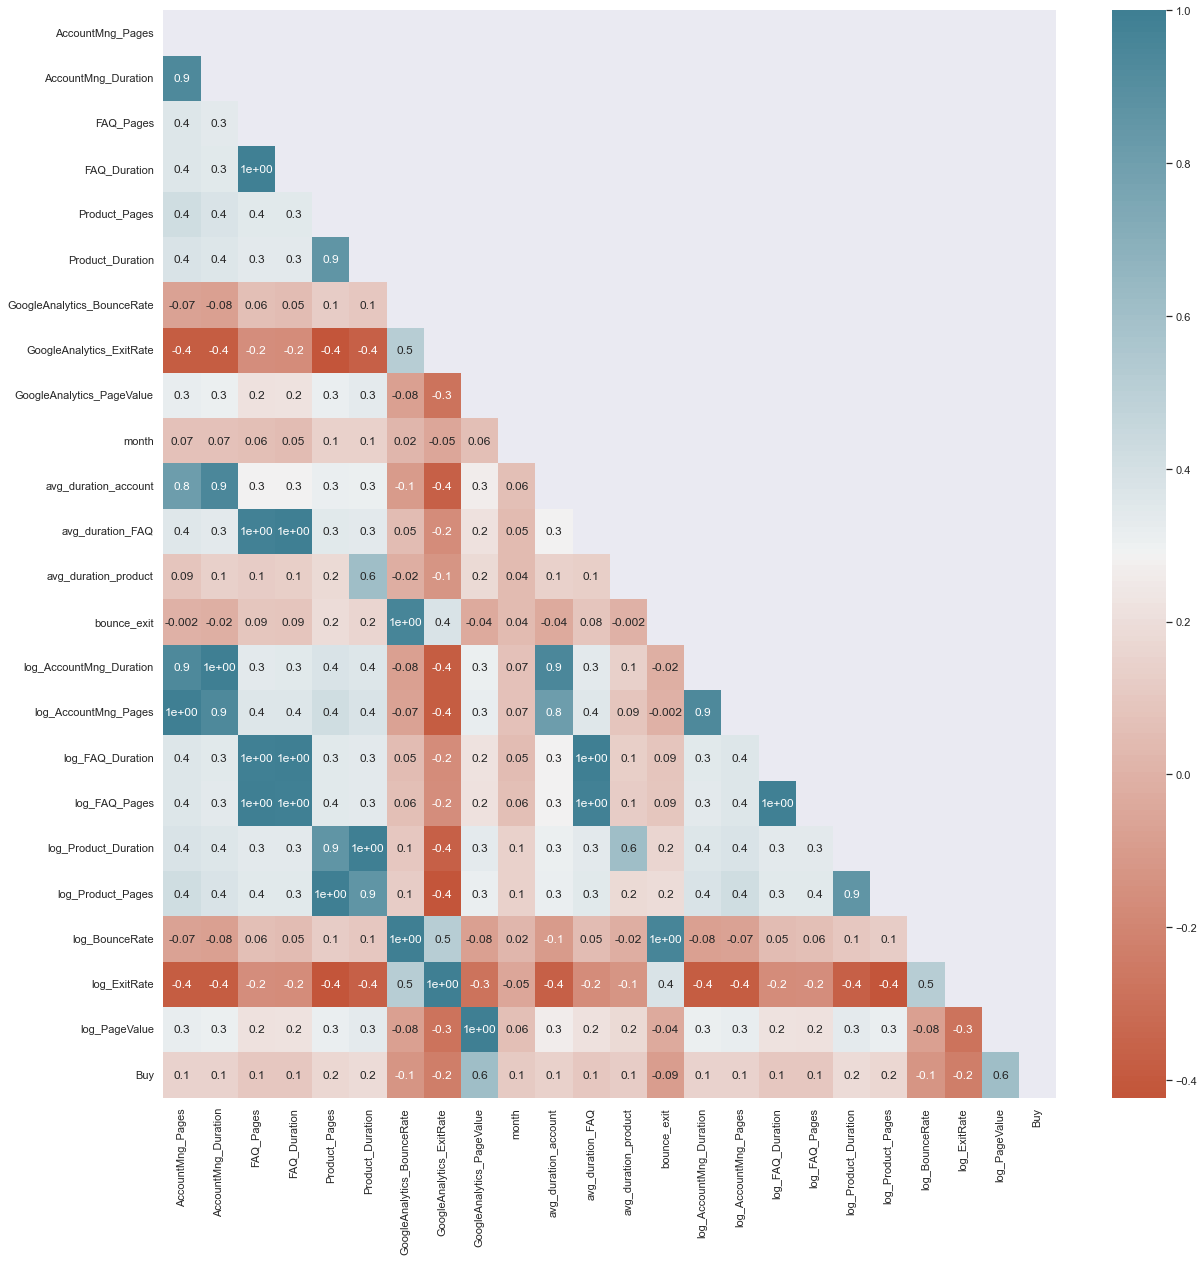

In [139]:
cor_heatmap(cor_spearman)

GoogleAnalytics_PageValue and log_PageValue are highly correlated with the target variable so we should keep them

- There are pairs of variables highly correlated, namely:
    - avg_duration_account vs AccountMng_Pages (0.9) <br>
    - avg_duration_account vs AccountMng_Duration (1) <br>
    - log_AccountMng_Duration vs AccountMng_Pages (0.9) <br>
    - log_FAQ_Duration vs FAQ_Pages (1) <br>
    - log_FAQ_Pages vs FAQ_Duration (1) <br>
    - log_Product_Duration vs Product_Pages (0.9) <br>
    - log_Product_Pages vs Product_Duration (0.9) <br>
    - log_BounceRate vs GoogleAnalytics_ExitRate (0.5) <br>
    - log_ExitRate vs GoogleAnalytics_BounceRate (0.9) <br>

<hr>
<a class="anchor" id="chi-squared">
    
### Chi-Squared
    
</a>

In [140]:
X_train_eng

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,...,traffic6,traffic7,traffic8,traffic9,traffic10,traffic11,traffic12,traffic13,traffic14,traffic15
Access_ID,,,,,,,,,,,,,,,,,,,,,
746917175,2020-09-19,4,77.099998,0,0.0,4,41.700001,0.0,0.0286,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
565616559,2020-12-16,0,0.0,4,8.0,66,1514.836304,0.0229,0.0449,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276412217,2020-12-30,7,131.833298,0,0.0,63,2074.611084,0.0108,0.02,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
361837847,2020-05-20,0,0.0,0,0.0,2,121.0,0.0,0.05,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
568629484,2020-03-20,0,0.0,0,0.0,21,1003.0,0.0,0.0083,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789752052,2020-07-02,5,109.599998,1,3.0,29,1980.266724,0.0061,0.0263,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581081929,2020-03-22,0,0.0,0,0.0,12,169.300003,0.0,0.0167,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
283517225,2020-12-25,5,97.0,0,0.0,53,3372.748291,0.0038,0.0025,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
X_chisquare=X_train_eng[non_num_feat1]

In [147]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [148]:
for var in X_chisquare:
    TestIndependence(X_chisquare[var],y_train_no_out, var)

Date is IMPORTANT for Prediction
OS is IMPORTANT for Prediction
Country is NOT an important predictor. (Discard Country from model)
Type_of_Traffic is IMPORTANT for Prediction
Type_of_Visitor is IMPORTANT for Prediction
day is NOT an important predictor. (Discard day from model)
Browser is NOT an important predictor. (Discard Browser from model)
browser2 is NOT an important predictor. (Discard browser2 from model)
browser3 is NOT an important predictor. (Discard browser3 from model)
browser4 is NOT an important predictor. (Discard browser4 from model)
browser5 is NOT an important predictor. (Discard browser5 from model)
browser6 is NOT an important predictor. (Discard browser6 from model)
browser7 is NOT an important predictor. (Discard browser7 from model)
browser8 is NOT an important predictor. (Discard browser8 from model)
x1_France is NOT an important predictor. (Discard x1_France from model)
x1_Germany is NOT an important predictor. (Discard x1_Germany from model)
x1_Italy is NOT 

<hr>
<a class="anchor" id="ANOVA">
    
### ANOVA
    
</a>

In [210]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest


In [141]:
X_train_conc_num=X_train_conc.drop(columns=non_num_feat)


In [143]:
def select_features(X_train, y_train):
    fs = SelectKBest(score_func=f_classif, k='all')
    fs.fit(X_train, y_train)
    
    X_train_fs = pd.DataFrame(fs.transform(X_train))
    
    #X_test_fs = fs.transform(X_test)
    return X_train_fs, fs


In [144]:
select_features(X_train_num_min, y_train_df)

(            0         1       2         3         4         5         6   \
 0     0.148148  0.029014  0.0000  0.000000  0.006849  0.001391  0.000000   
 1     0.000000  0.000000  0.2500  0.003545  0.113014  0.050544  0.124932   
 2     0.259259  0.049611  0.0000  0.000000  0.107877  0.069222  0.058920   
 3     0.000000  0.000000  0.0000  0.000000  0.003425  0.004037  0.000000   
 4     0.000000  0.000000  0.0000  0.000000  0.035959  0.033466  0.000000   
 ...        ...       ...     ...       ...       ...       ...       ...   
 6266  0.185185  0.041245  0.0625  0.001329  0.049658  0.066074  0.033279   
 6267  0.000000  0.000000  0.0000  0.000000  0.020548  0.005649  0.000000   
 6268  0.185185  0.036503  0.0000  0.000000  0.090753  0.112536  0.020731   
 6269  0.000000  0.000000  0.0000  0.000000  0.046233  0.035302  0.146754   
 6270  0.259259  0.059270  0.0625  0.010191  0.071918  0.116883  0.027823   
 
             7         8    9   ...        13        14        15        1

In [146]:
X_train_fs, fs =select_features(X_train_num_min, y_train_df)
dict_feat={}

for i in range(len(fs.scores_)):
    dict_feat[X_train_num_min.columns[i]]=fs.scores_[i]
    
dict(sorted(dict_feat.items(), key=lambda item: item[1]))
 

{'avg_duration_product': 2.5884225899682596,
 'avg_duration_FAQ': 14.692901168683196,
 'avg_duration_account': 21.40044286033633,
 'FAQ_Duration': 30.80881292356942,
 'FAQ_Pages': 44.92964495411391,
 'AccountMng_Duration': 46.199831403677344,
 'log_FAQ_Pages': 58.582529566583624,
 'bounce_exit': 58.91816277169909,
 'log_FAQ_Duration': 67.75413135663261,
 'month': 94.55559349838981,
 'AccountMng_Pages': 102.24423791435615,
 'Product_Pages': 125.5280207539196,
 'GoogleAnalytics_BounceRate': 125.92096821624781,
 'Product_Duration': 128.38270740978948,
 'log_BounceRate': 128.53001282534584,
 'log_AccountMng_Pages': 135.95537638636262,
 'log_AccountMng_Duration': 144.127347272942,
 'log_Product_Pages': 186.32277290977297,
 'log_Product_Duration': 210.9031289660741,
 'GoogleAnalytics_ExitRate': 290.4970960487895,
 'log_ExitRate': 297.1392304855503,
 'GoogleAnalytics_PageValue': 2045.6616644049411,
 'log_PageValue': 3945.6148588485585}

<hr>
<a class="anchor" id="wrapper">
    
## Wrapper Methods
    
</a>

<hr>
<a class="anchor" id="RFE">
    
### RFE
    
</a>

Optimal number of features : 21
Max accuracy: 0.886620614263574


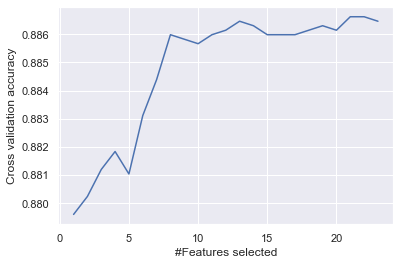

array([0.87960388, 0.88024215, 0.88119878, 0.88183643, 0.88103924,
       0.88311225, 0.88438786, 0.88598286, 0.88582332, 0.88566398,
       0.88598286, 0.8861424 , 0.88646138, 0.88630184, 0.88598286,
       0.88598266, 0.88598266, 0.88614209, 0.88630163, 0.8861422 ,
       0.88662061, 0.88662061, 0.88646118])

In [271]:
#Doing the same using RFECV and KFold

import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from operator import itemgetter
from sklearn.linear_model import LogisticRegression

min_features_to_select = 1  
rfecv = RFECV(
    estimator=LogisticRegression(),
    step=1,
    cv=StratifiedKFold(4),
    scoring="accuracy",
    min_features_to_select= min_features_to_select
)
rfecv.fit(X_train_num_min, y_train_df)

print(f"Optimal number of features : {rfecv.n_features_}")
print(f"Max accuracy: {np.amax(rfecv.grid_scores_)}" )

# Plot features vs validation scores
plt.figure()
plt.xlabel("#Features selected")
plt.ylabel("Cross validation accuracy")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()
# update  version
rfecv.grid_scores_

In [275]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True])

<hr>
<a class="anchor" id="forward">
    
### Forward Sequential Feature Selection
    
</a>

In [148]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier



knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
sfs = SequentialFeatureSelector(knn, n_features_to_select=8,direction='forward')
sfs.fit(X_train_num_min, y_train_no_out.to_list())

sfs.get_support()

teste=sfs.transform(X_train_num_min)

In [149]:
sfs.support_

array([False, False, False, False, False, False,  True,  True,  True,
       False,  True,  True, False,  True, False, False, False, False,
       False, False,  True,  True, False])

In [126]:
X_train_num_min

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,month,...,log_bounce_exit,log_AccountMng_Duration,log_AccountMng_Pages,log_FAQ_Duration,log_FAQ_Pages,log_Product_Duration,log_Product_Pages,log_BounceRate,log_ExitRate,log_PageValue
Access_ID,,,,,,,,,,,,,,,,,,,,,
746917175,0.148148,0.036077,0.0000,0.000000,0.006849,0.001544,0.000000,0.151403,0.000000,0.7,...,0.000000,0.568358,0.482995,0.000000,0.000000,0.367915,0.252595,0.000000,0.162971,0.000000
565616559,0.000000,0.000000,0.2500,0.003545,0.113014,0.056085,0.124932,0.237692,0.000000,1.0,...,0.231988,0.000000,0.000000,0.284534,0.568061,0.717731,0.659910,0.134526,0.253838,0.000000
276412217,0.259259,0.061688,0.0000,0.000000,0.107877,0.076809,0.058920,0.105876,0.000000,1.0,...,0.243053,0.637624,0.624044,0.000000,0.000000,0.748531,0.652721,0.063824,0.114447,0.000000
361837847,0.000000,0.000000,0.0000,0.000000,0.003425,0.004480,0.000000,0.264690,0.000000,0.3,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.470798,0.172423,0.000000,0.281977,0.000000
568629484,0.000000,0.000000,0.0000,0.000000,0.035959,0.037135,0.000000,0.043939,0.000000,0.1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.677357,0.485127,0.000000,0.047771,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789752052,0.185185,0.051284,0.0625,0.001329,0.049658,0.073316,0.033279,0.139227,0.000000,0.5,...,0.117417,0.613735,0.537710,0.179521,0.244651,0.743973,0.533805,0.036134,0.150033,0.000000
581081929,0.000000,0.000000,0.0000,0.000000,0.020548,0.006268,0.000000,0.088407,0.000000,0.1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.503485,0.402559,0.000000,0.095719,0.000000
283517225,0.185185,0.045388,0.0000,0.000000,0.090753,0.124871,0.020731,0.013235,0.000000,1.0,...,0.520272,0.597960,0.537710,0.000000,0.000000,0.796137,0.626056,0.022535,0.014431,0.000000


In [127]:
teste

array([[0.00684932, 0.00154388, 0.        , ..., 0.        , 0.16297103,
        0.        ],
       [0.1130137 , 0.05608457, 0.1249318 , ..., 0.13452615, 0.25383754,
        0.        ],
       [0.10787671, 0.0768094 , 0.0589198 , ..., 0.06382438, 0.11444708,
        0.        ],
       ...,
       [0.09075342, 0.12487101, 0.02073104, ..., 0.02253518, 0.01443078,
        0.        ],
       [0.04623288, 0.03917176, 0.14675396, ..., 0.15771525, 0.20941945,
        0.        ],
       [0.07191781, 0.1296943 , 0.02782324, ..., 0.0302248 , 0.10423949,
        0.55154754]])

In [128]:
selected_feat_forward = pd.Series(sfs.get_support(), index = X_train_num_min.columns)
selected_feat_forward

AccountMng_Pages              False
AccountMng_Duration           False
FAQ_Pages                     False
FAQ_Duration                  False
Product_Pages                  True
Product_Duration               True
GoogleAnalytics_BounceRate     True
GoogleAnalytics_ExitRate       True
GoogleAnalytics_PageValue      True
month                         False
log_month                     False
avg_duration_account          False
avg_duration_FAQ              False
avg_duration_product          False
bounce_exit                   False
log_bounce_exit               False
log_AccountMng_Duration       False
log_AccountMng_Pages          False
log_FAQ_Duration              False
log_FAQ_Pages                 False
log_Product_Duration          False
log_Product_Pages             False
log_BounceRate                 True
log_ExitRate                   True
log_PageValue                  True
dtype: bool

<hr>
<a class="anchor" id="forward">
    
### Backward Sequential Feature Selection
    
</a>

In [129]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier


knn_back = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
sfs_back = SequentialFeatureSelector(knn_back, n_features_to_select=8,direction='backward')
sfs_back.fit(X_train_num_min, y_train_no_out.to_list())

sfs_back.get_support()

array([False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False,  True,  True, False,
       False,  True,  True, False, False,  True,  True])

In [130]:
selected_feat_back = pd.Series(sfs_back.get_support(), index = X_train_num_min.columns)
selected_feat_back

AccountMng_Pages              False
AccountMng_Duration           False
FAQ_Pages                     False
FAQ_Duration                  False
Product_Pages                 False
Product_Duration              False
GoogleAnalytics_BounceRate    False
GoogleAnalytics_ExitRate      False
GoogleAnalytics_PageValue     False
month                          True
log_month                      True
avg_duration_account          False
avg_duration_FAQ              False
avg_duration_product          False
bounce_exit                   False
log_bounce_exit                True
log_AccountMng_Duration        True
log_AccountMng_Pages          False
log_FAQ_Duration              False
log_FAQ_Pages                  True
log_Product_Duration           True
log_Product_Pages             False
log_BounceRate                False
log_ExitRate                   True
log_PageValue                  True
dtype: bool

<hr>
<a class="anchor" id="embedded">
    
## Embedded Methods
    
</a>


<hr>
<a class="anchor" id="ridge">
    
### Ridge Regression    
</a>

In [255]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifier

In [256]:
ridge = Ridge()
ridge.fit(X_train_num_min, y_train_df)

Ridge()

In [257]:
ridge_coefs = pd.Series(ridge.coef_[0], index = X_train_num_min.columns)
ridge_coefs

AccountMng_Pages             -0.175242
AccountMng_Duration          -0.021589
FAQ_Pages                    -0.097907
FAQ_Duration                  0.100710
Product_Pages                 0.210851
Product_Duration              0.332329
GoogleAnalytics_BounceRate    0.112343
GoogleAnalytics_ExitRate     -0.044147
GoogleAnalytics_PageValue    -0.237461
month                         0.085157
avg_duration_account          0.053585
avg_duration_FAQ             -0.146637
avg_duration_product         -0.032851
bounce_exit                  -0.295265
log_AccountMng_Duration      -0.016204
log_AccountMng_Pages          0.013153
log_FAQ_Duration             -0.002102
log_FAQ_Pages                 0.018241
log_Product_Duration         -0.074182
log_Product_Pages            -0.121736
log_BounceRate                0.059036
log_ExitRate                 -0.194923
log_PageValue                 1.033272
dtype: float64

In [258]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

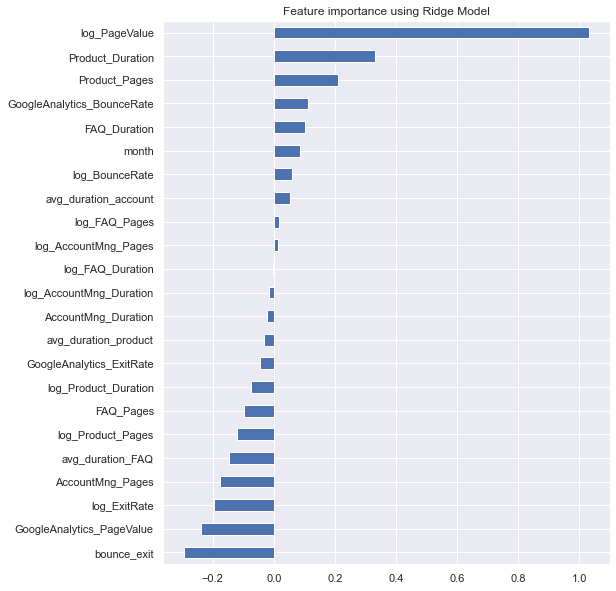

In [259]:
plot_importance(ridge_coefs,'Ridge')

<hr>
<a class="anchor" id="scale2">
    
# Scale the data
    
</a>

<hr>
<a class="anchor" id="redo-outliers">
    
# Redo outliers check
    
</a>

<hr>
<a class="anchor" id="imbalanced">
    
# Check for an imbalanced dataset
    
</a>

<hr>
<a class="anchor" id="Adaptive">
    
## Adaptive Syntetic Oversampling 
    
</a>

In [82]:
#y_train_s=y_train_df.squeeze()

In [139]:
y_train_s.value_counts()

0    5257
1    1013
Name: Buy, dtype: Int64

In [140]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
from imblearn.over_sampling import ADASYN

# define pipeline
adasyn = ADASYN(sampling_strategy='minority', random_state=0, n_neighbors=5)
X_train_over, y_train_over = adasyn.fit_resample(X_train_eng, y_train_no_out.to_list())
X_train_over

In [93]:
count1=0
count0=0

for value in y_train_over:
    if value==1:
        count1+=1
    else: count0+=1
        
print(count1,count0)

5227 5257
